In [1]:
from evaluate_12ECG_score import evaluate_12ECG_score
from driver import load_challenge_data
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config import exp_net_params, default_net_params
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# Huber loss as decisive


In [2]:
csv_path="/home/puszkar/ecg/results/csv_outputs/LBBB-Normal-RBBB-AF-STE-PAC-PVC-huber"
test_path = "/home/puszkar/ecg/data/LBBB-Normal-RBBB-AF-STE-PAC-PVCtest"

In [3]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0009
A0010
A0022
A0027
A0028
A0029
A0030
A0031
A0046
A0053
A0062
A0064
A0074
A0081
A0083
A0084
A0095
A0097
A0101
A0103
A0105
A0107
A0108
A0114
A0115
A0129
A0131
A0137
A0138
A0144
A0156
A0158
A0162
A0164
A0174
A0200
A0215
A0222
A0228
A0229
A0231
A0241
A0249
A0252
A0265
A0267
A0294
A0296
A0302
A0305
A0321
A0329
A0347
A0349
A0354
A0360
A0369
A0372
A0378
A0379
A0383
A0392
A0393
A0413
A0419
A0421
A0422
A0423
A0426
A0427
A0436
A0447
A0451
A0452
A0461
A0470
A0486
A0490
A0492
A0495
A0526
A0529
A0532
A0535
A0537
A0544
A0554
A0559
A0572
A0578
A0583
A0592
A0603
A0606
A0617
A0627
A0635
A0648
A0652
A0663
A0665
A0671
A0674
A0679
A0684
A0710
A0715
A0716
A0724
A0731
A0733
A0737
A0749
A0752
A0753
A0756
A0768
A0781
A0806
A0813
A0821
A0822
A0823
A0841
A0843
A0846
A0865
A0872
A0880
A0888
A0904
A0906
A0911
A0918
A0924
A0939
A0943
A0954
A0956
A0957
A0974
A0987
A0989
A0991
A0993
A0995
A1007
A1008
A1012
A1018
A1019
A1022
A1030
A1056
A1072
A1098
A1101
A1106
A1132
A1144
A1156
A1175
A1190
A1196
A1201
A1215
A122

In [4]:
def simmilar(row1, row2):
    for i, x in enumerate(row1):
        if x == row2[i] and x == 1:
            return True
    return False

def numeric_classes(array2d):
    result = []
    for single_array in array2d:
        for idx, value in enumerate(single_array):
            if value != 0:
                result.append(idx)
                break

    return result

In [5]:
count_of_signals_proper = 0
for x, row in enumerate(y_pred):
    if simmilar(row, y_true[x]):
        print(row, "-->", y_true[x])
        count_of_signals_proper+=1
count_of_signals_proper

[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[0 0 0 1 0 0 0] --> [0 0 0 1 0 0 0]
[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[0 1 0 0 0 0 0] --> [0 1 0 0 0 0 0]
[0 0 0 1 0 0 0] --> [0 0 0 1 0 0 0]
[0 0 0 0 0 1 0] --> [0 0 0 0 0 1 0]
[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[0 0 0 1 0 0 0] --> [0 0 0 1 0 0 0]
[0 0 0 0 0 1 0] --> [0 0 0 0 0 1 0]
[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[0 0 0 1 0 0 0] --> [0 0 0 1 0 0 0]
[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[1 0 0 0 0 0 0] --> [1 0 0 0 0 0 0]
[0 0 0 0 0 1 0] --> [0 0 0 0 0 1 0]
[0 0 0 0 0 1 0] --> [0 0 0 0 0 1 0]
[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[1 0 0 0 0 0 0] --> [1 0 0 0 0 0 0]
[0 0 0 0 0 1 0] --> [0 0 0 0 0 1 0]
[1 0 0 0 0 0 0] --> [1 0 0 0 0 0 0]
[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[0 0 0 1 0 0 0] --> [0 0 0 1 0 0 0]
[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[0 0 1 0 0 0 0] --> [0 0 1 0 0 0 0]
[0 0 0 1 0 0 0] --> [0 0 0 1 0 0 0]
[0 0 1 0 0 0 0] --> [0 0 1 0 0 0 0]
[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[0 0 0 0 1 0 0] --> [0 0 0 0 1 0 0]
[0 0 0 0 0 1 0] --> [0 0 0 0

162

[]

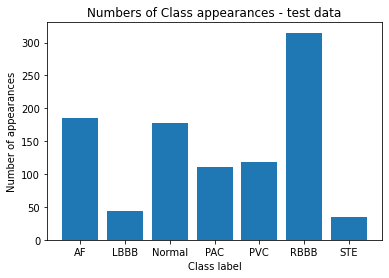

In [6]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_true.sum(axis=0))
plt.title("Numbers of Class appearances - test data")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

[]

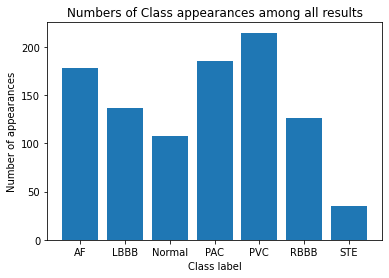

In [7]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [8]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

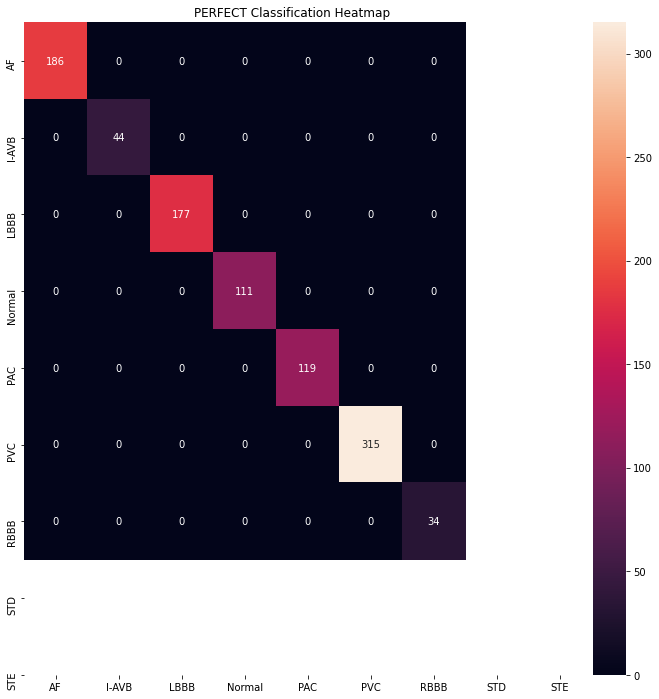

In [9]:
real_confusion = confusion_matrix(y_true_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("PERFECT Classification Heatmap")
sns.heatmap(real_confusion, annot=True, cbar=True, xticklabels=sorted(default_net_params["classes"]), yticklabels=sorted(default_net_params["classes"]), fmt="g")
plt.plot()
real_confusion[real_confusion == 0] = 1

In [10]:
def draw_confusion(y_pred_numeric, y_true_numeric):
    confusion = confusion_matrix(y_pred_numeric, y_true_numeric)
    fig = plt.figure(figsize=(12,12))
    plt.title("Classification Heatmap")
    sns.heatmap(np.round(confusion/real_confusion, 3), annot=True, cbar=True, xticklabels=sorted(exp_net_params["classes"]), yticklabels=sorted(exp_net_params["classes"]), fmt="g")
    plt.plot()

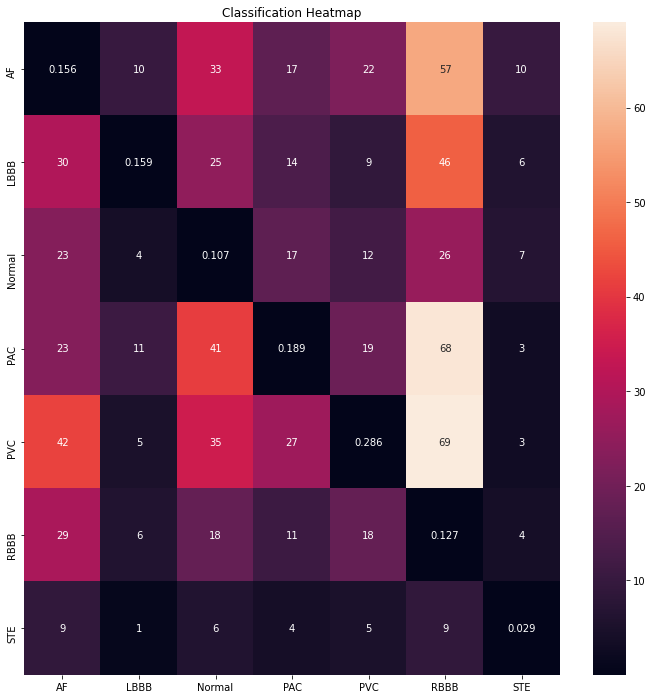

In [11]:
draw_confusion(y_pred_numeric, y_true_numeric[:-1])

In [12]:
def draw_rocs(y_true, y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(exp_net_params['classes'])
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    color="red"
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    classes = sorted(['LBBB', 'STD', 'Normal', 'RBBB', 'AF', 'I-AVB', 'STE', 'PAC', 'PVC'])

    # Plot all ROC curves
    for i in range(n_classes):
        plt.figure(figsize=(12,10))
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        plt.plot(fpr[i], tpr[i], color=color,
            label='ROC curve of class {0} (area = {1:0.2f})'
            ''.format(classes[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right", fontsize="xx-large")
        plt.show()

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


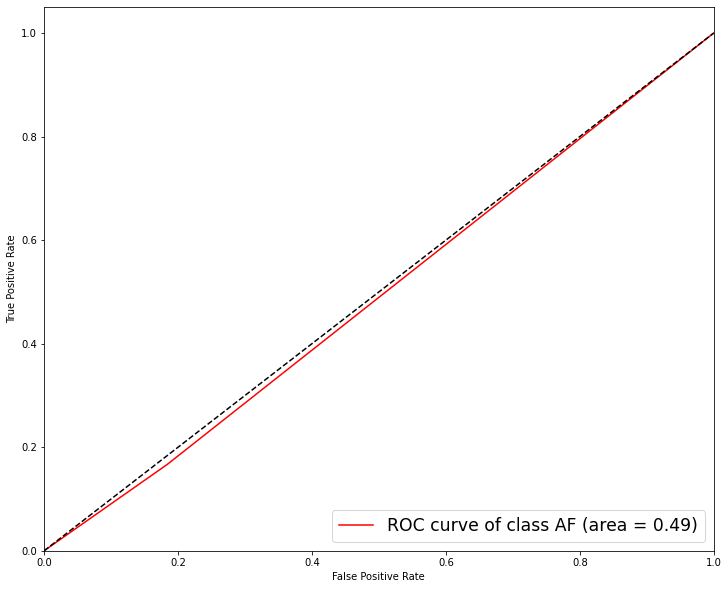

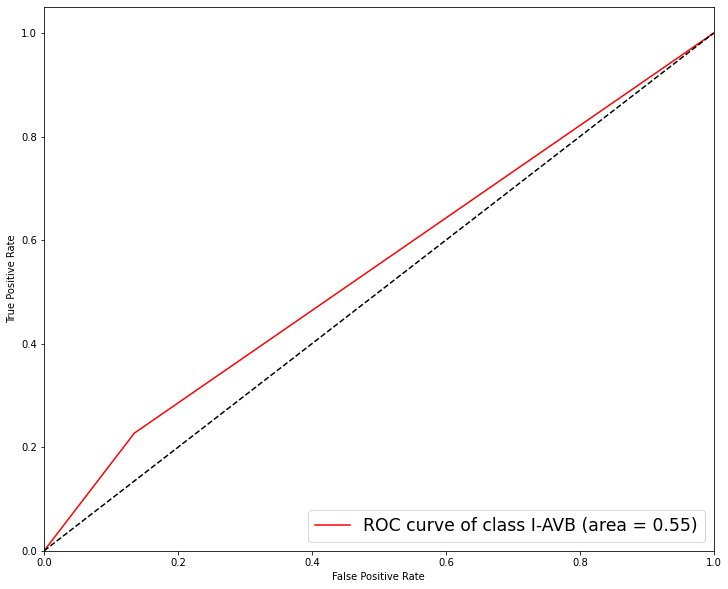

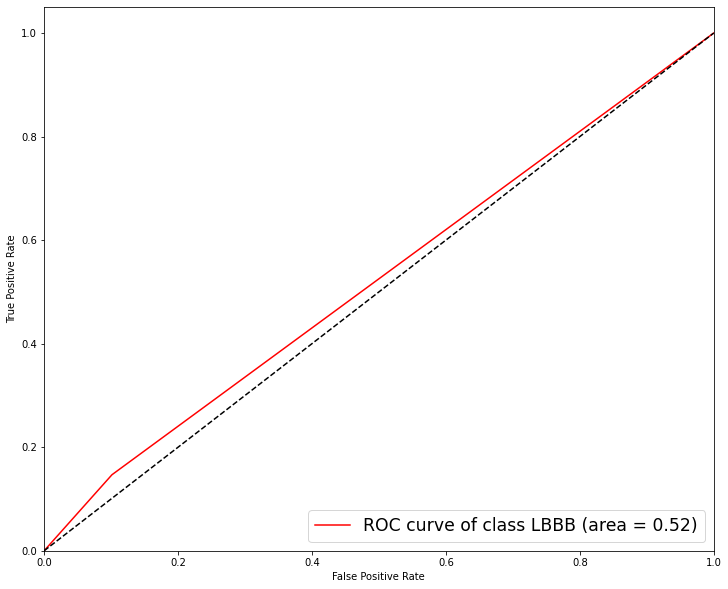

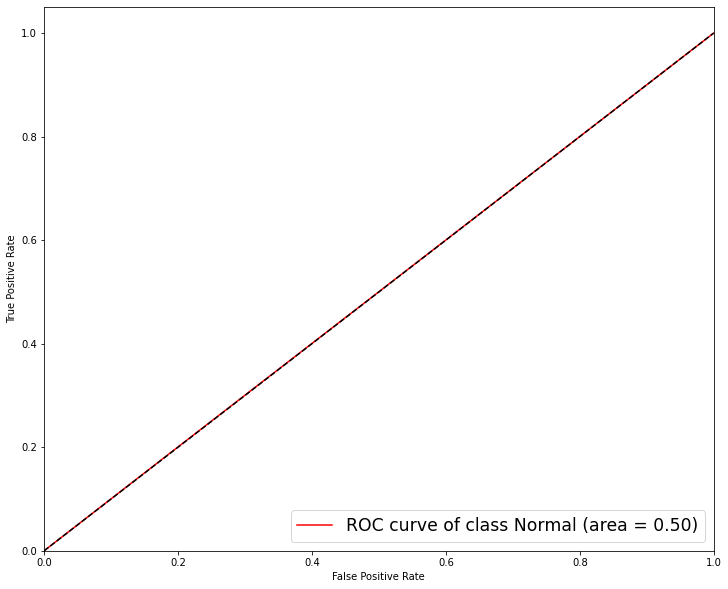

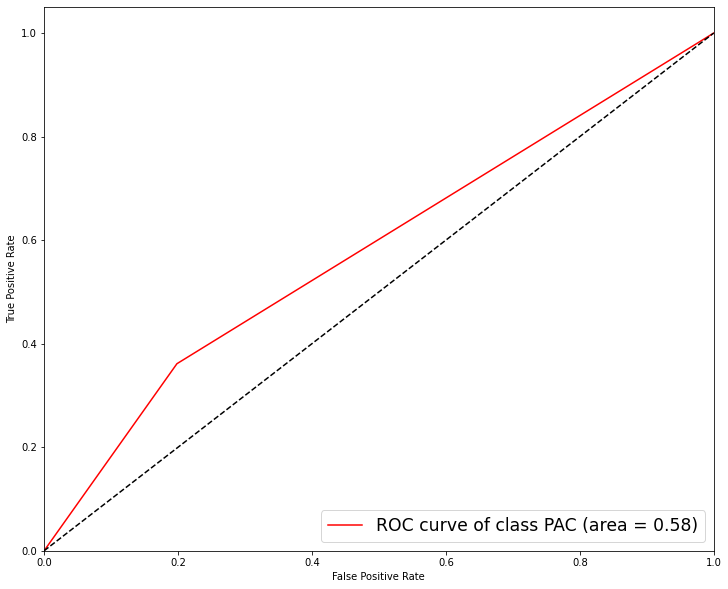

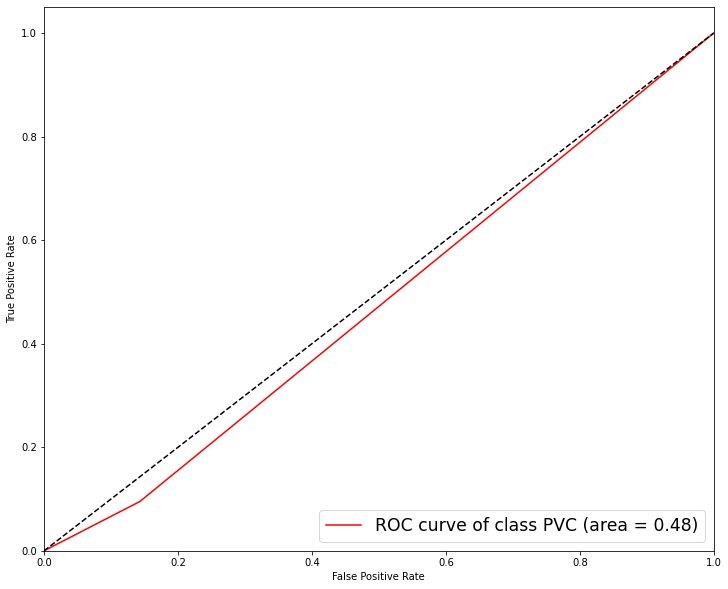

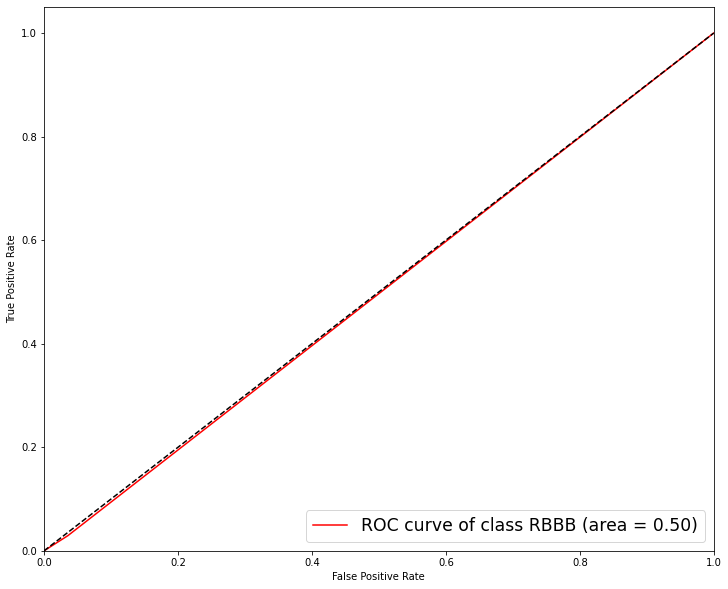

In [13]:
draw_rocs(y_true, y_pred)

# MSLE criterion as decisive

In [14]:
csv_path="/home/puszkar/ecg/results/csv_outputs/LBBB-Normal-RBBB-AF-STE-PAC-PVC-msle"

In [15]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0009
A0010
A0022
A0027
A0028
A0029
A0030
A0031
A0046
A0053
A0062
A0064
A0074
A0081
A0083
A0084
A0095
A0097
A0101
A0103
A0105
A0107
A0108
A0114
A0115
A0129
A0131
A0137
A0138
A0144
A0156
A0158
A0162
A0164
A0174
A0200
A0215
A0222
A0228
A0229
A0231
A0241
A0249
A0252
A0265
A0267
A0294
A0296
A0302
A0305
A0321
A0329
A0347
A0349
A0354
A0360
A0369
A0372
A0378
A0379
A0383
A0392
A0393
A0413
A0419
A0421
A0422
A0423
A0426
A0427
A0436
A0447
A0451
A0452
A0461
A0470
A0486
A0490
A0492
A0495
A0526
A0529
A0532
A0535
A0537
A0544
A0554
A0559
A0572
A0578
A0583
A0592
A0603
A0606
A0617
A0627
A0635
A0648
A0652
A0663
A0665
A0671
A0674
A0679
A0684
A0710
A0715
A0716
A0724
A0731
A0733
A0737
A0749
A0752
A0753
A0756
A0768
A0781
A0806
A0813
A0821
A0822
A0823
A0841
A0843
A0846
A0865
A0872
A0880
A0888
A0904
A0906
A0911
A0918
A0924
A0939
A0943
A0954
A0956
A0957
A0974
A0987
A0989
A0991
A0993
A0995
A1007
A1008
A1012
A1018
A1019
A1022
A1030
A1056
A1072
A1098
A1101
A1106
A1132
A1144
A1156
A1175
A1190
A1196
A1201
A1215
A122

[]

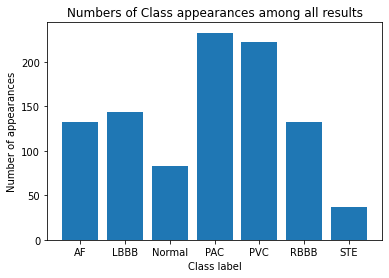

In [16]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [17]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

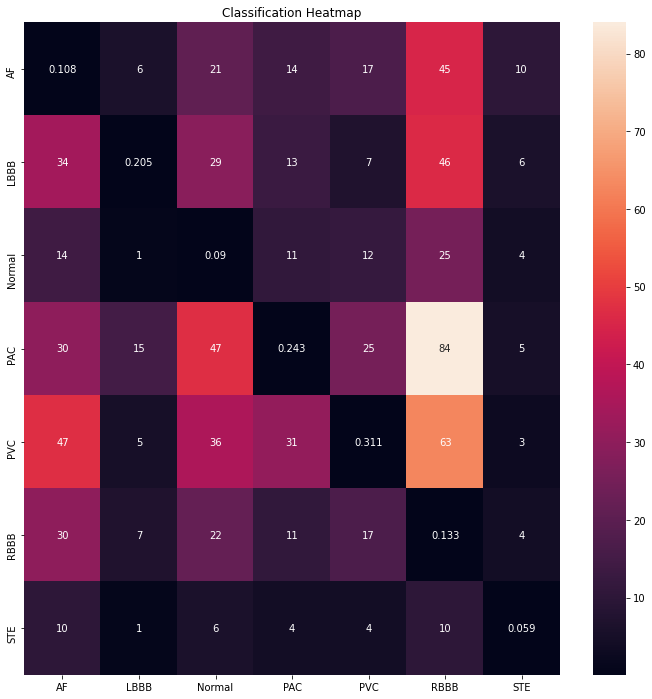

In [18]:
draw_confusion(y_pred_numeric, y_true_numeric[:-1])

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


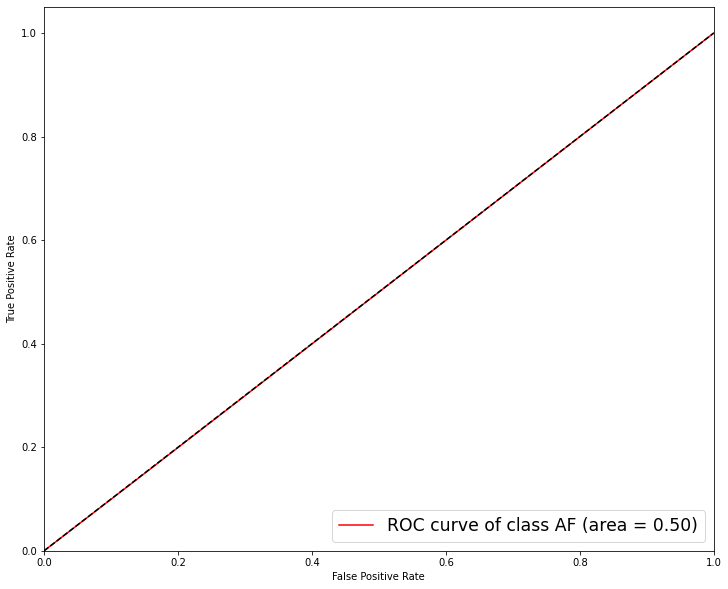

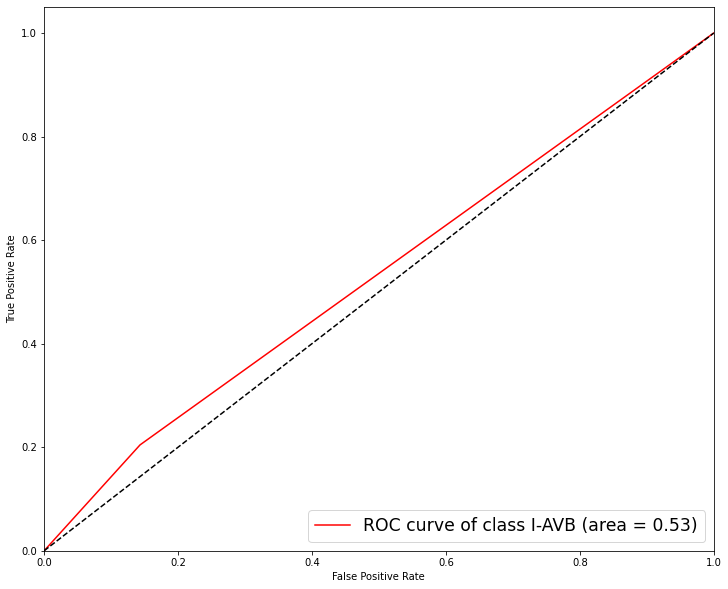

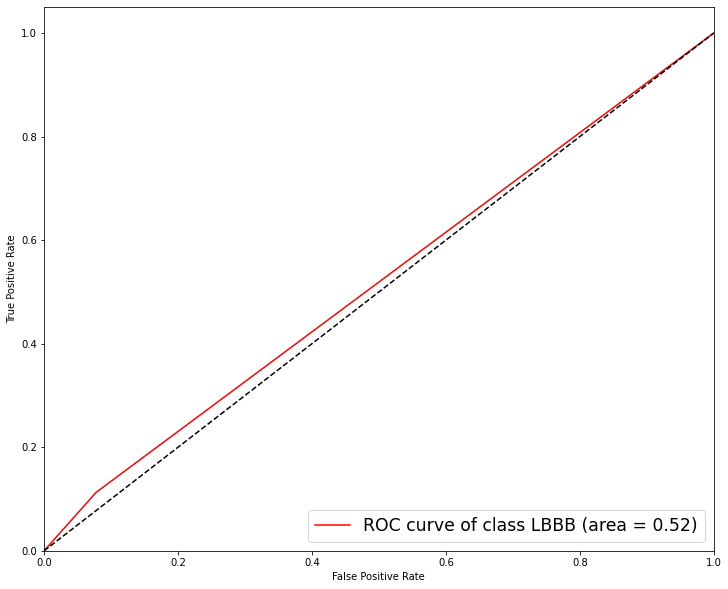

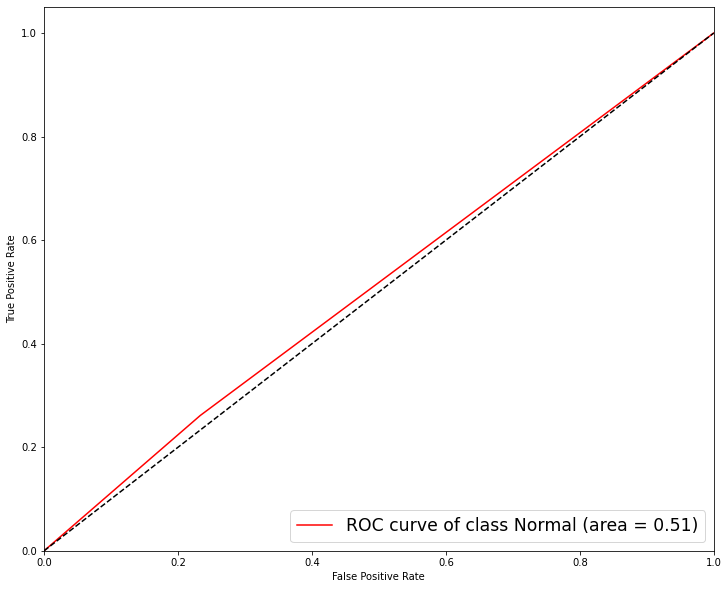

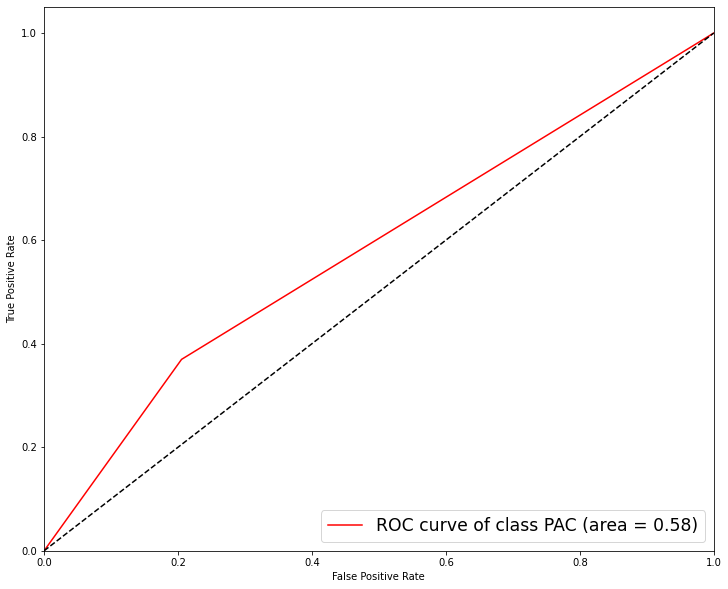

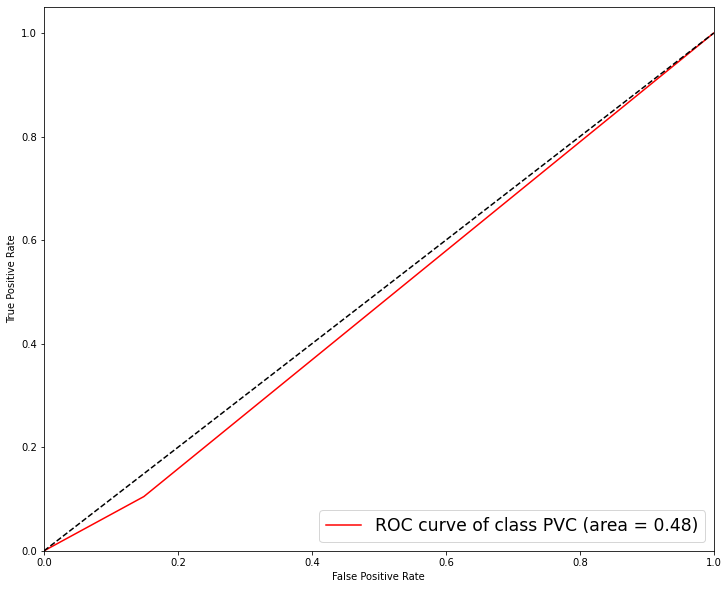

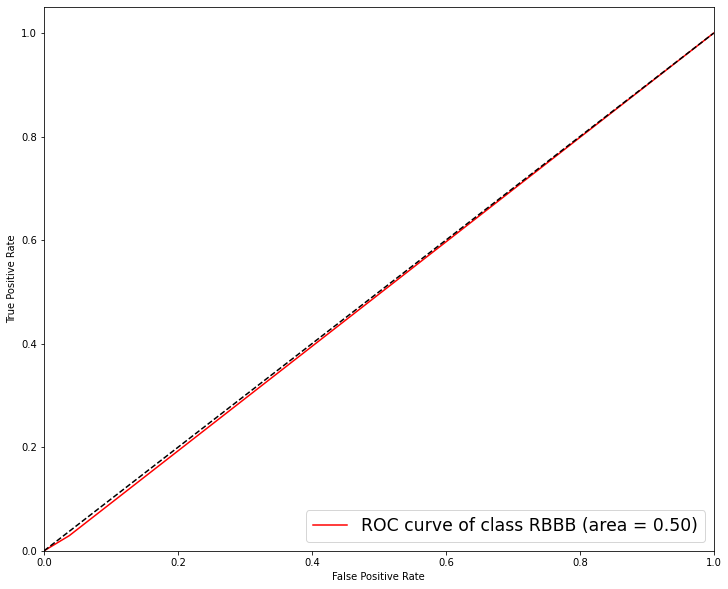

In [19]:
draw_rocs(y_true, y_pred)

# LogCosh as decisive

In [20]:
csv_path="/home/puszkar/ecg/results/csv_outputs/LBBB-Normal-RBBB-AF-STE-PAC-PVC-logcosh"

In [21]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0009
A0010
A0022
A0027
A0028
A0029
A0030
A0031
A0046
A0053
A0062
A0064
A0074
A0081
A0083
A0084
A0095
A0097
A0101
A0103
A0105
A0107
A0108
A0114
A0115
A0129
A0131
A0137
A0138
A0144
A0156
A0158
A0162
A0164
A0174
A0200
A0215
A0222
A0228
A0229
A0231
A0241
A0249
A0252
A0265
A0267
A0294
A0296
A0302
A0305
A0321
A0329
A0347
A0349
A0354
A0360
A0369
A0372
A0378
A0379
A0383
A0392
A0393
A0413
A0419
A0421
A0422
A0423
A0426
A0427
A0436
A0447
A0451
A0452
A0461
A0470
A0486
A0490
A0492
A0495
A0526
A0529
A0532
A0535
A0537
A0544
A0554
A0559
A0572
A0578
A0583
A0592
A0603
A0606
A0617
A0627
A0635
A0648
A0652
A0663
A0665
A0671
A0674
A0679
A0684
A0710
A0715
A0716
A0724
A0731
A0733
A0737
A0749
A0752
A0753
A0756
A0768
A0781
A0806
A0813
A0821
A0822
A0823
A0841
A0843
A0846
A0865
A0872
A0880
A0888
A0904
A0906
A0911
A0918
A0924
A0939
A0943
A0954
A0956
A0957
A0974
A0987
A0989
A0991
A0993
A0995
A1007
A1008
A1012
A1018
A1019
A1022
A1030
A1056
A1072
A1098
A1101
A1106
A1132
A1144
A1156
A1175
A1190
A1196
A1201
A1215
A122

[]

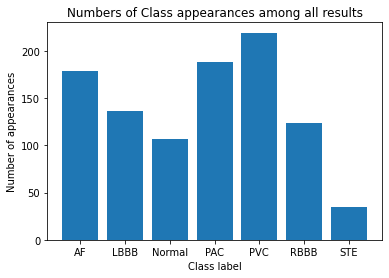

In [22]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [23]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

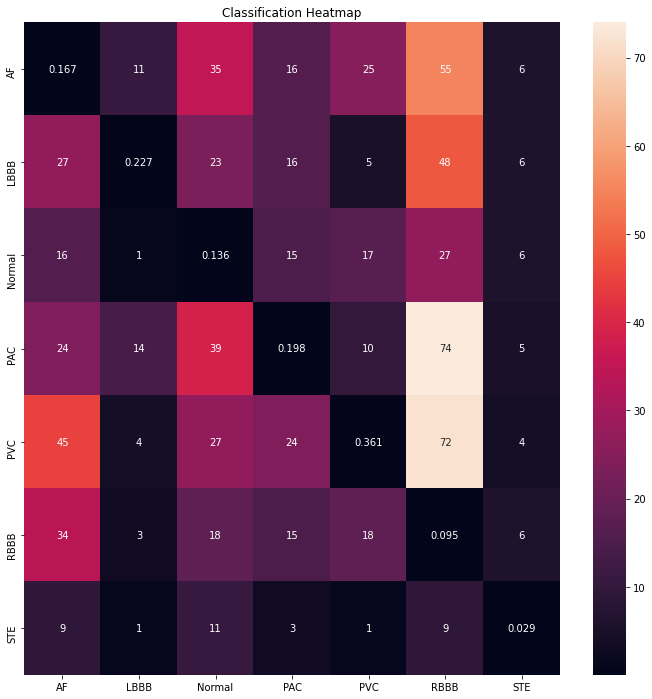

In [24]:
draw_confusion(y_pred_numeric, y_true_numeric)

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


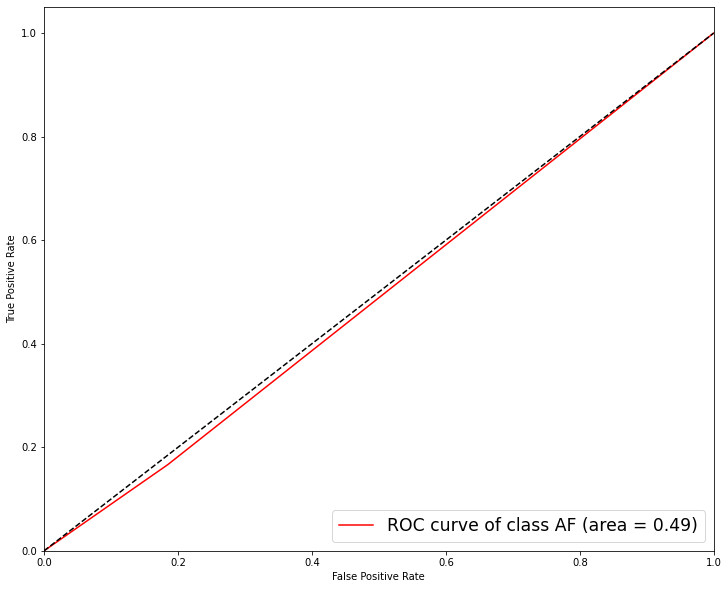

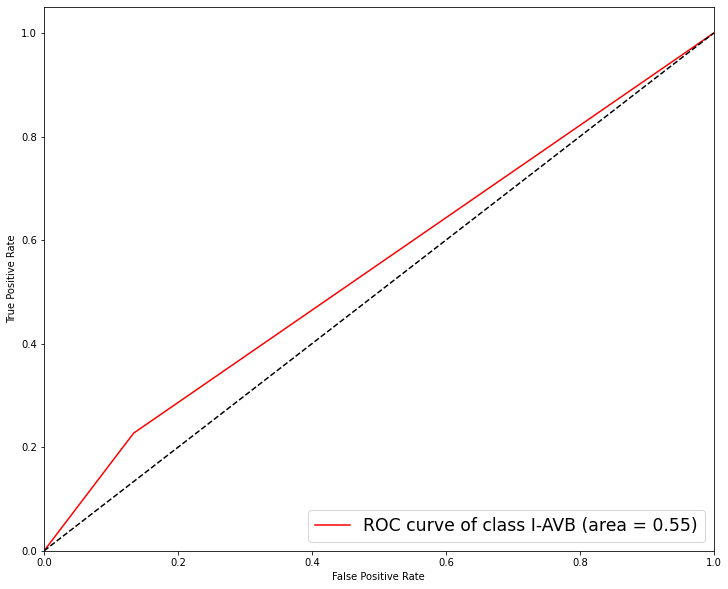

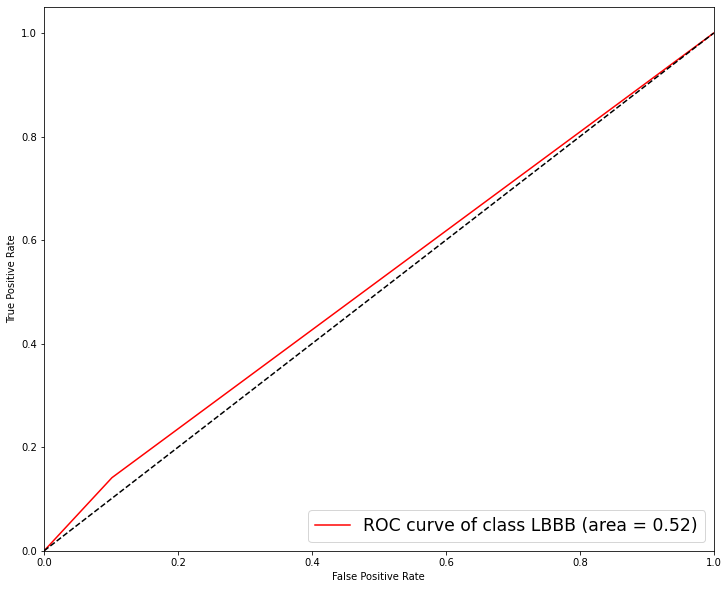

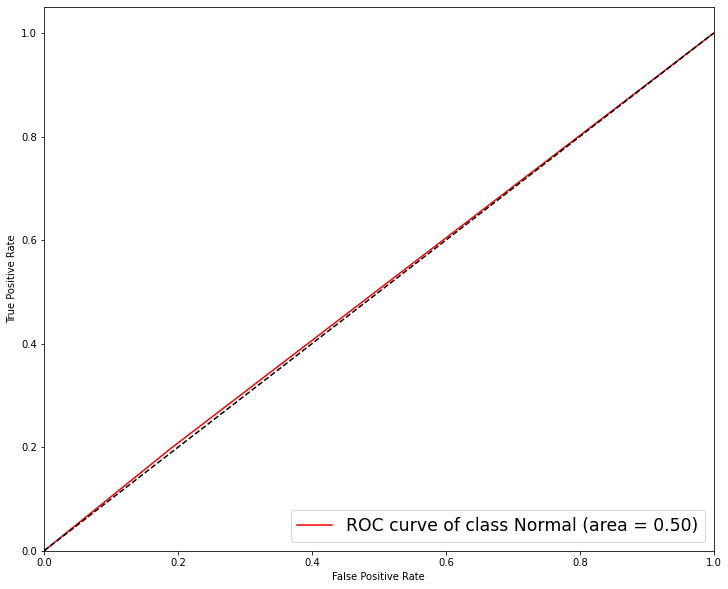

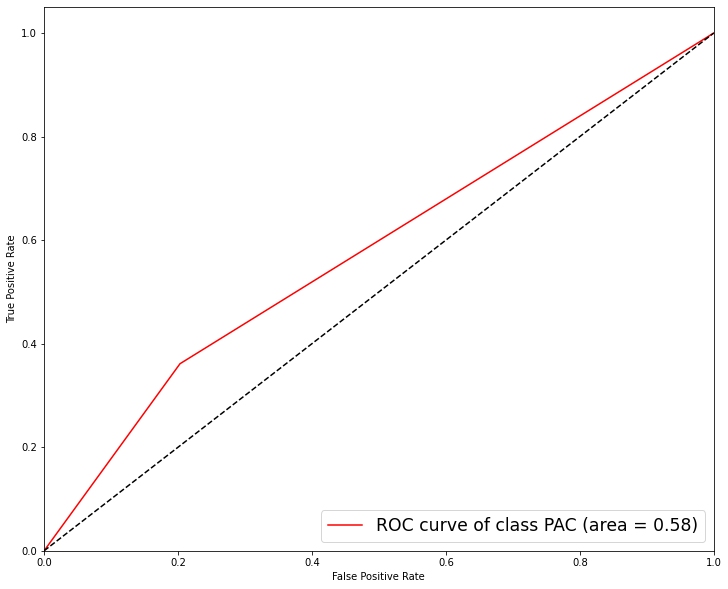

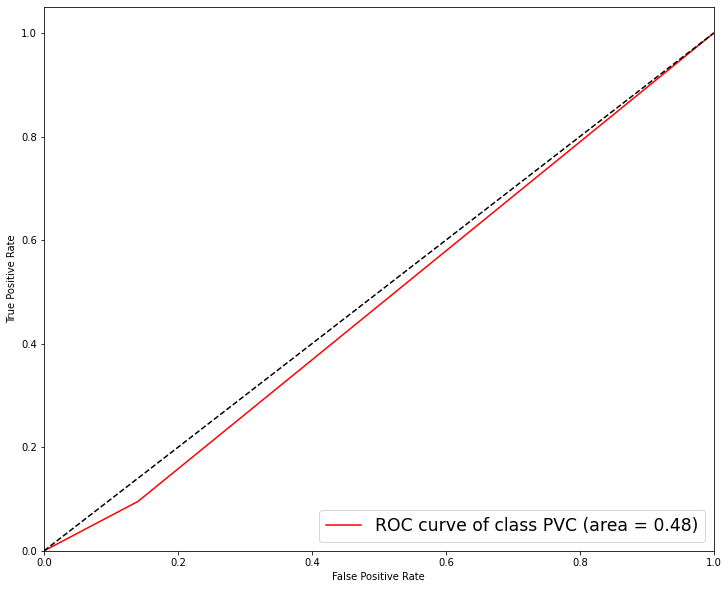

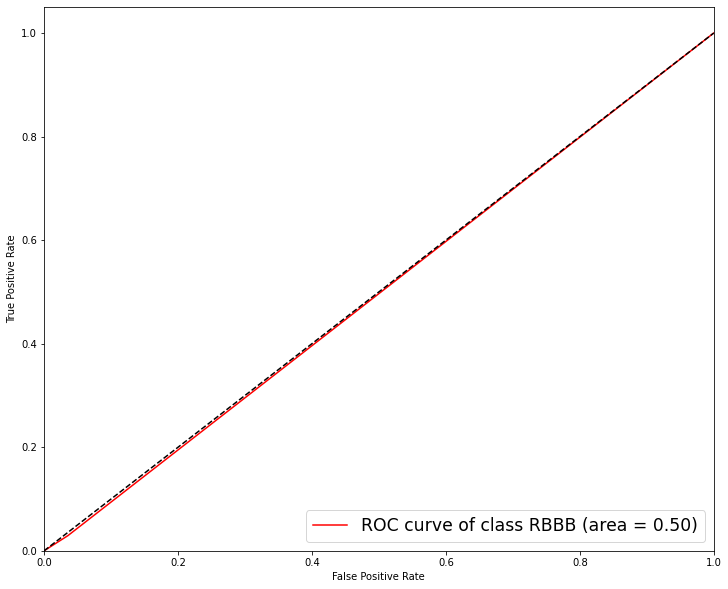

In [25]:
draw_rocs(y_true, y_pred)

# MSE loss as a criterion

In [26]:
csv_path="/home/puszkar/ecg/results/csv_outputs/LBBB-Normal-RBBB-AF-STE-PAC-PVC-mse"

In [27]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0009
A0010
A0022
A0027
A0028
A0029
A0030
A0031
A0046
A0053
A0062
A0064
A0074
A0081
A0083
A0084
A0095
A0097
A0101
A0103
A0105
A0107
A0108
A0114
A0115
A0129
A0131
A0137
A0138
A0144
A0156
A0158
A0162
A0164
A0174
A0200
A0215
A0222
A0228
A0229
A0231
A0241
A0249
A0252
A0265
A0267
A0294
A0296
A0302
A0305
A0321
A0329
A0347
A0349
A0354
A0360
A0369
A0372
A0378
A0379
A0383
A0392
A0393
A0413
A0419
A0421
A0422
A0423
A0426
A0427
A0436
A0447
A0451
A0452
A0461
A0470
A0486
A0490
A0492
A0495
A0526
A0529
A0532
A0535
A0537
A0544
A0554
A0559
A0572
A0578
A0583
A0592
A0603
A0606
A0617
A0627
A0635
A0648
A0652
A0663
A0665
A0671
A0674
A0679
A0684
A0710
A0715
A0716
A0724
A0731
A0733
A0737
A0749
A0752
A0753
A0756
A0768
A0781
A0806
A0813
A0821
A0822
A0823
A0841
A0843
A0846
A0865
A0872
A0880
A0888
A0904
A0906
A0911
A0918
A0924
A0939
A0943
A0954
A0956
A0957
A0974
A0987
A0989
A0991
A0993
A0995
A1007
A1008
A1012
A1018
A1019
A1022
A1030
A1056
A1072
A1098
A1101
A1106
A1132
A1144
A1156
A1175
A1190
A1196
A1201
A1215
A122

[]

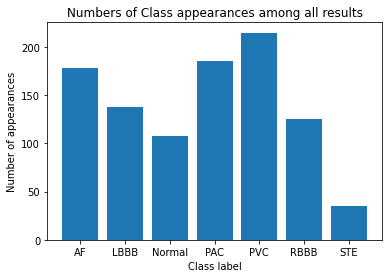

In [28]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [29]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

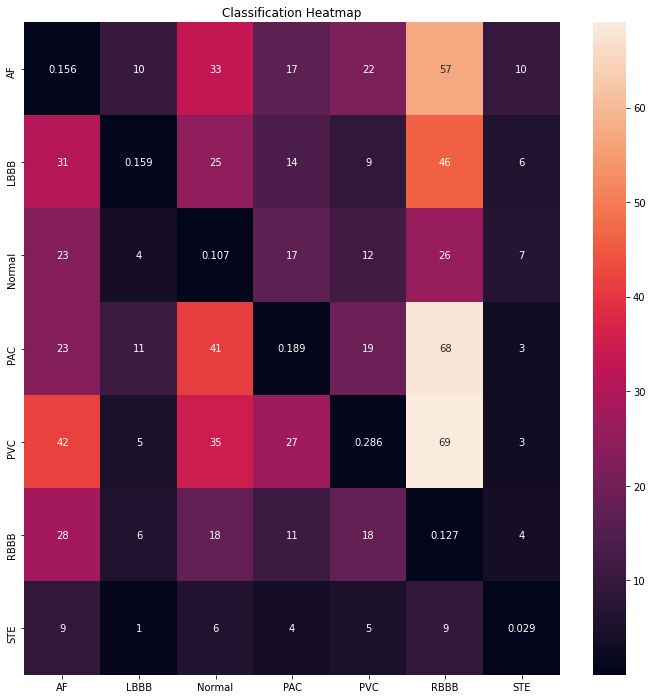

In [30]:
draw_confusion(y_pred_numeric, y_true_numeric[:-1])

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


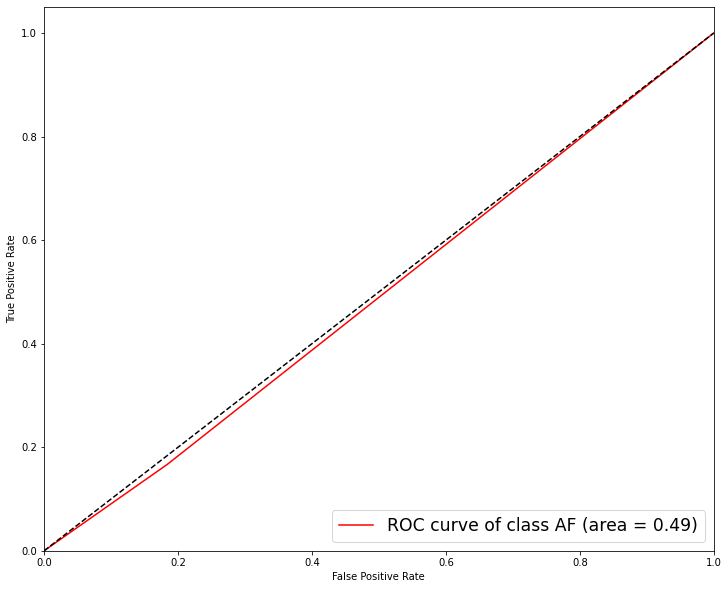

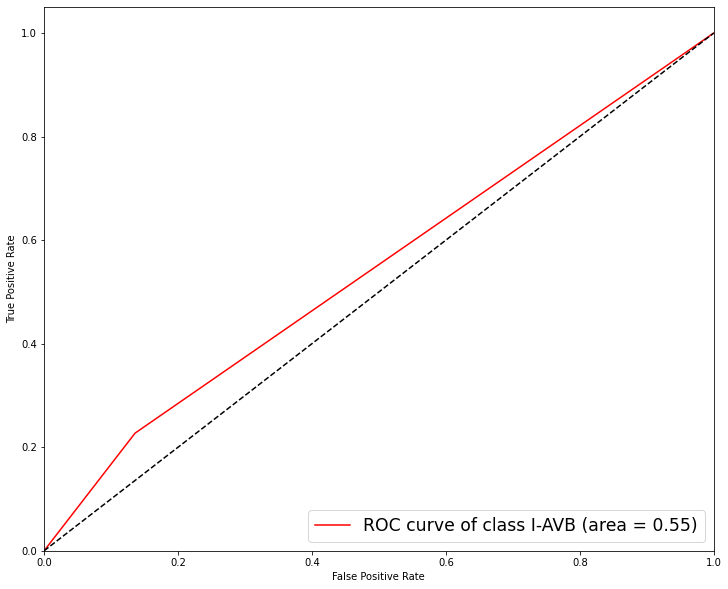

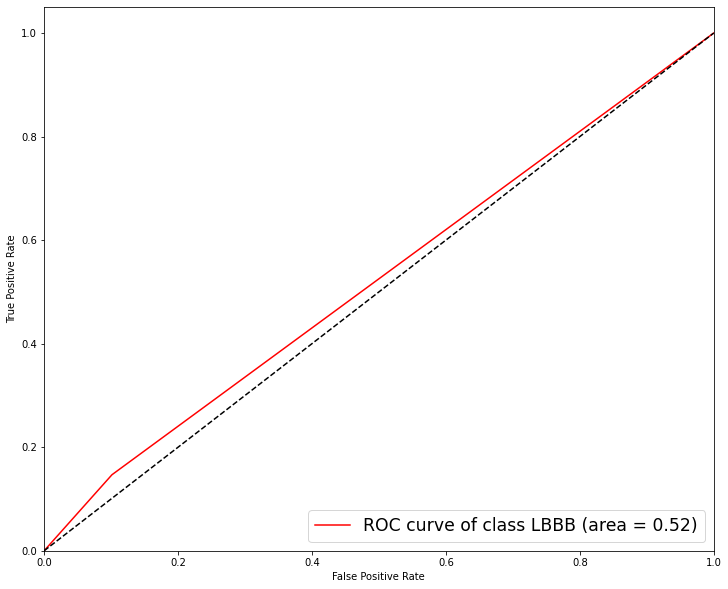

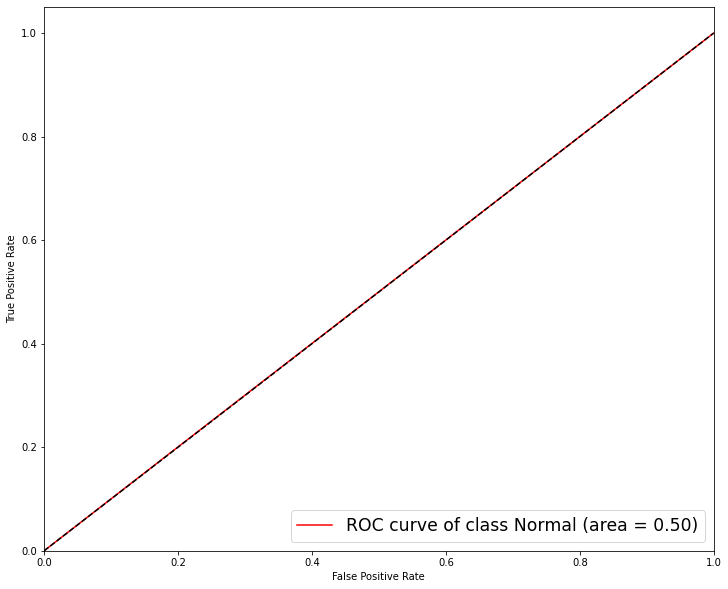

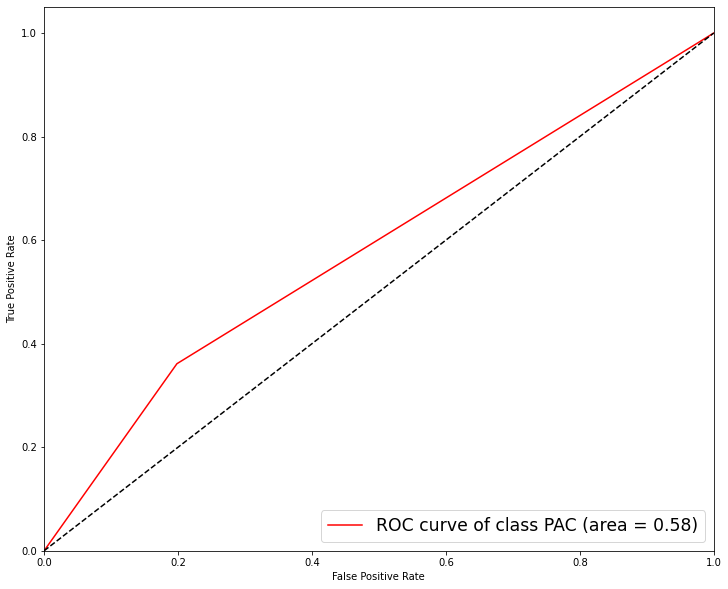

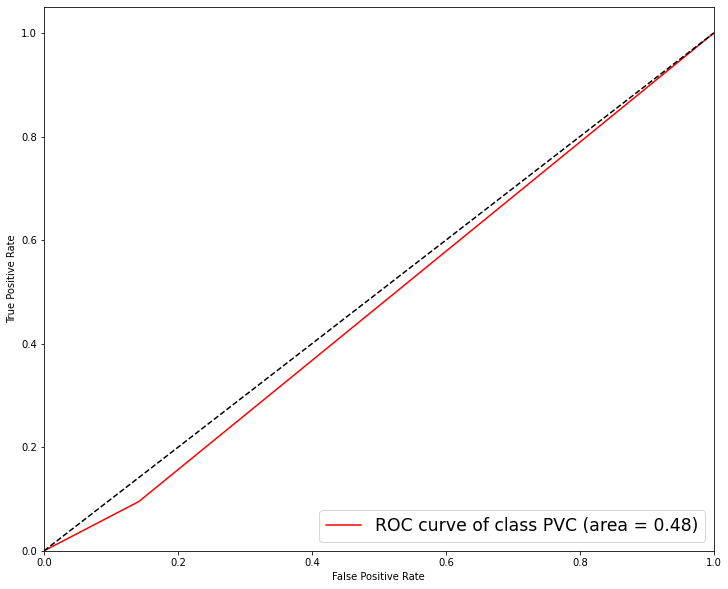

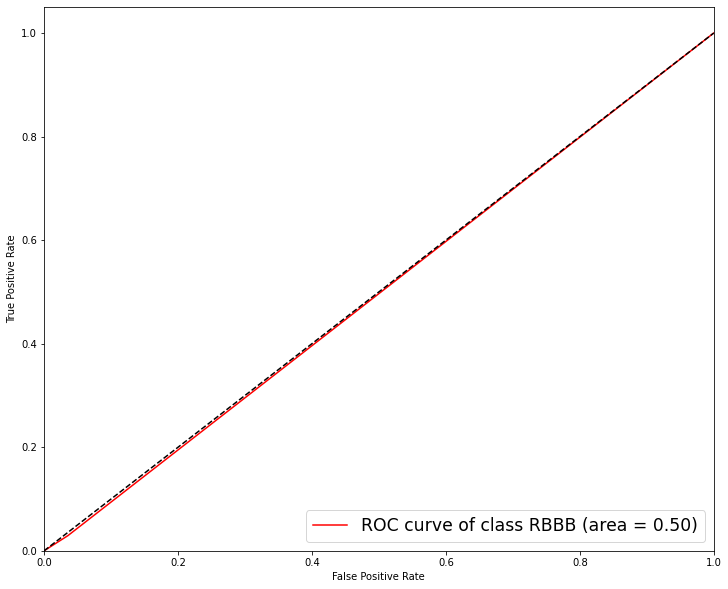

In [31]:
draw_rocs(y_true, y_pred)

# FASTDTW loss as a criterion

In [34]:
csv_path="/home/puszkar/ecg/results/csv_outputs/LBBB-Normal-RBBB-AF-STE-PAC-PVCtest"

In [35]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0009
A0010
A0022
A0027
A0028
A0029
A0030
A0031
A0046
A0053
A0062
A0064
A0074
A0081
A0083
A0084
A0095
A0097
A0101
A0103
A0105
A0107
A0108
A0114
A0115
A0129
A0131
A0137
A0138
A0144
A0156
A0158
A0162
A0164
A0174
A0200
A0215
A0222
A0228
A0229
A0231
A0241
A0249
A0252
A0265
A0267
A0294
A0296
A0302
A0305
A0321
A0329
A0347
A0349
A0354
A0360
A0369
A0372
A0378
A0379
A0383
A0392
A0393
A0413
A0419
A0421
A0422
A0423
A0426
A0427
A0436
A0447
A0451
A0452
A0461
A0470
A0486
A0490
A0492
A0495
A0526
A0529
A0532
A0535
A0537
A0544
A0554
A0559
A0572
A0578
A0583
A0592
A0603
A0606
A0617
A0627
A0635
A0648
A0652
A0663
A0665
A0671
A0674
A0679
A0684
A0710
A0715
A0716
A0724
A0731
A0733
A0737
A0749
A0752
A0753
A0756
A0768
A0781
A0806
A0813
A0821
A0822
A0823
A0841
A0843
A0846
A0865
A0872
A0880
A0888
A0904
A0906
A0911
A0918
A0924
A0939
A0943
A0954
A0956
A0957
A0974
A0987
A0989
A0991
A0993
A0995
A1007
A1008
A1012
A1018
A1019
A1022
A1030
A1056
A1072
A1098
A1101
A1106
A1132
A1144
A1156
A1175
A1190
A1196
A1201
A1215
A122

[]

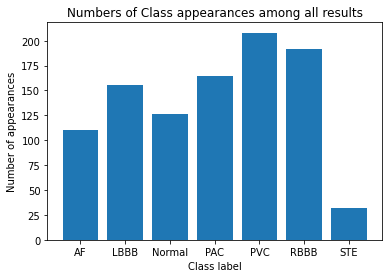

In [36]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [37]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

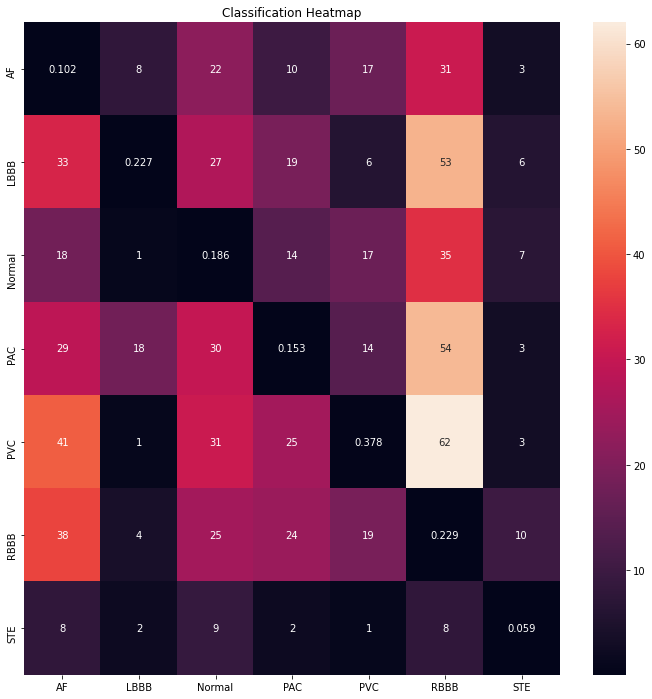

In [38]:
draw_confusion(y_pred_numeric, y_true_numeric)

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


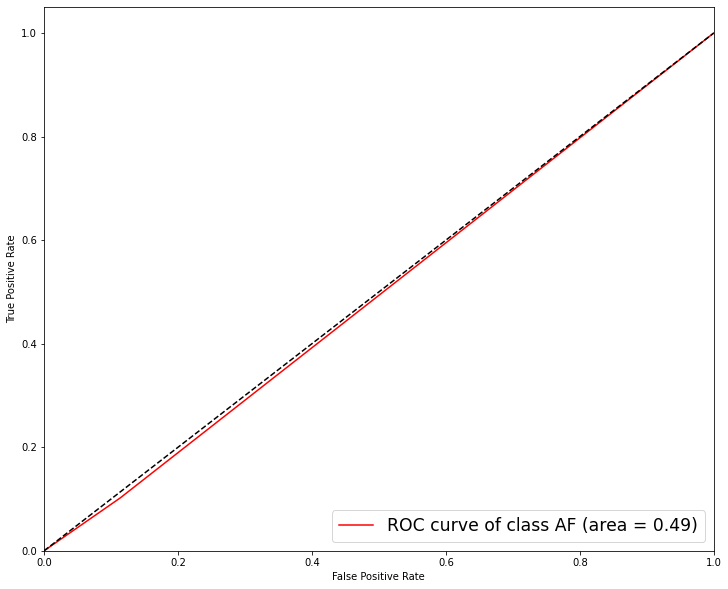

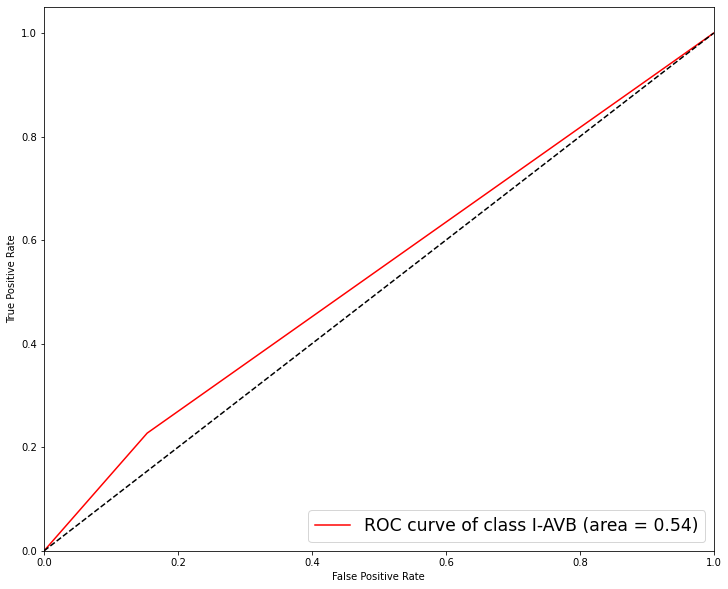

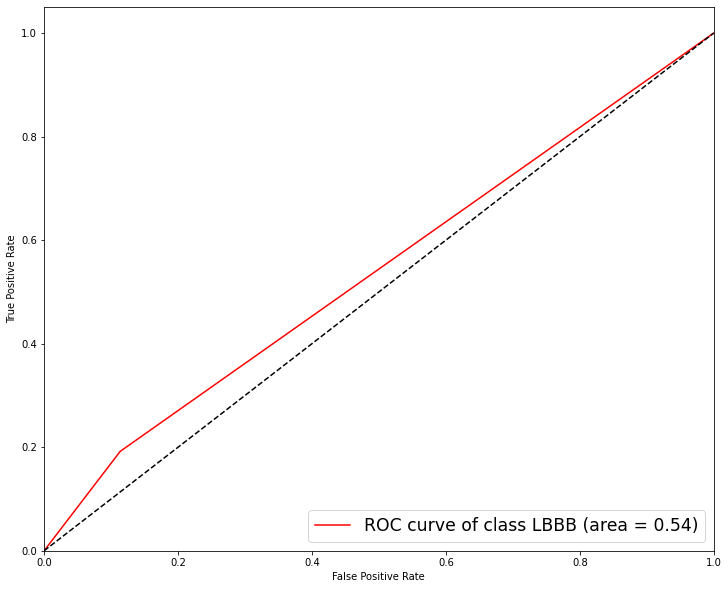

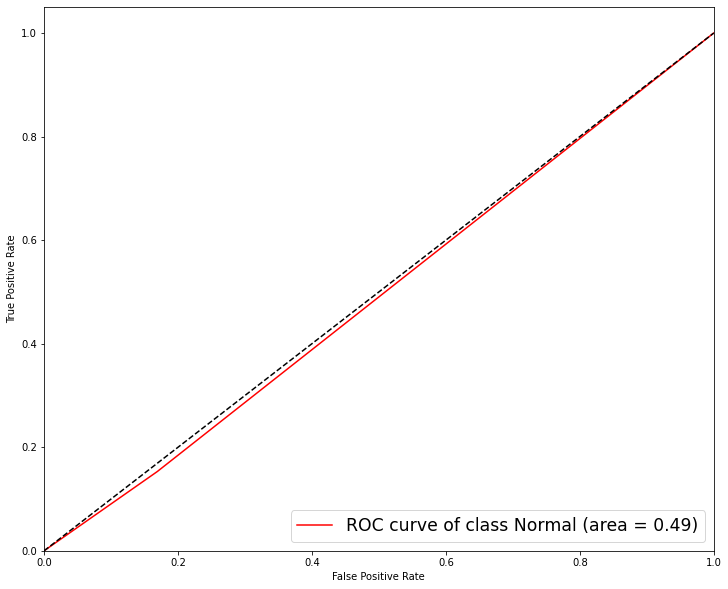

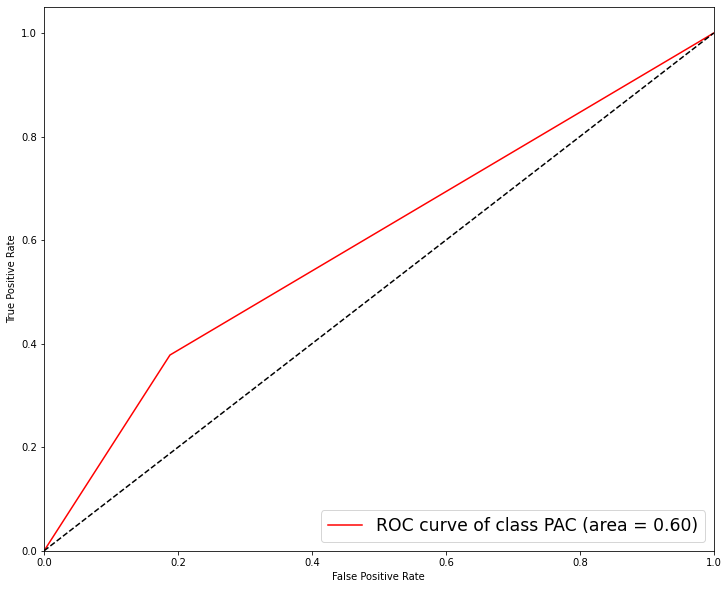

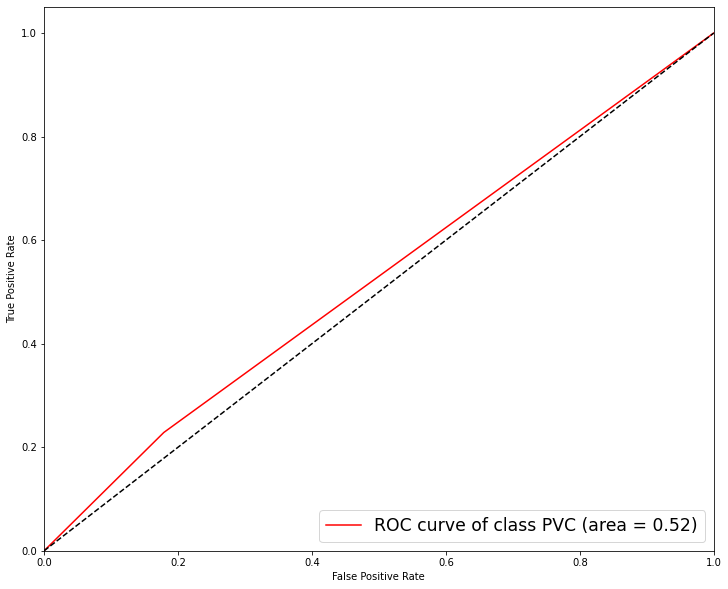

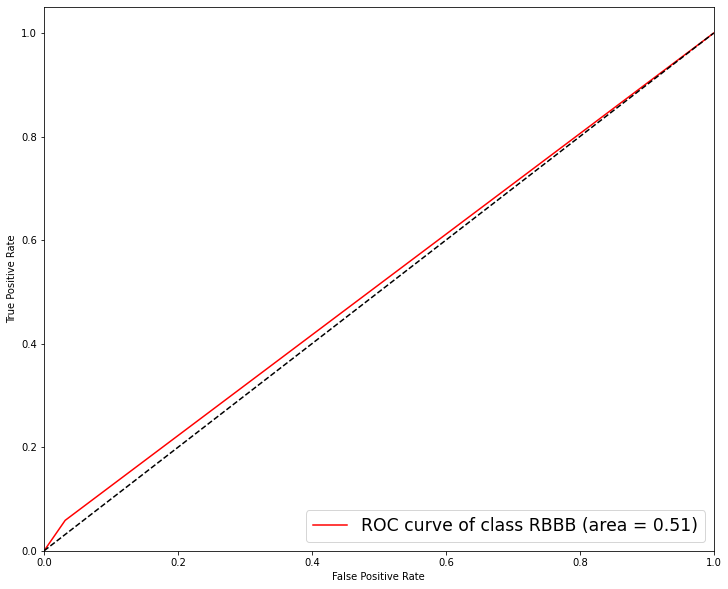

In [39]:
draw_rocs(y_true, y_pred)